# Introductory Example

The equation of motion for the system is:

$m\ddot{x}=u(t) - f(t)$

or

$\ddot{x}=\frac{u(t)-f(t)}{m}$

If the force input and disturbances are constant, this can be easily integrated to get the change in velocity and change in position. Assuming $x(0), \, \dot{x}(0)=0$:

$\dot{x}=\frac{u-f}{m}t$

and

$x=\frac{u-f}{m}t^2$

In [52]:
import numpy as np
from scipy.integrate import solve_ivp, cumulative_trapezoid
import matplotlib.pyplot as plt

In [71]:
def system_response(xd,u_max,f_t,m,t):

    t1 = 0
    t2 = np.sqrt(xd*m/u_max)
    t3 = 2*t2

    # acceleration from force command
    x_ddot_command = (u_max)/m*(t>=t1)*(t<t2) + (-u_max)/m*(t>=t2)*(t<t3)

    # acceleration from disturbance
    x_ddot_disturbance = (-f_t)/m*(t>=1)*(t<1.2)

    x_ddot = x_ddot_command + x_ddot_disturbance

    # x_dot = (u_max-0)/m*(t-t1)*(t>=t1)*(t<t2) + (-u_max - 0)/m*(t-t2)*(t>=t2)*(t<t3) + 0
    # x = (u_max-0)/m*t**2*(t>=t1)*(t<t2) + (-u_max - 0)/m*t**2*(t>=t2)*(t<t3) + 0

    x_dot = cumulative_trapezoid(x_ddot,x=t,initial=0)

    x = cumulative_trapezoid(x_dot,x=t,initial=0)

    return x_ddot_command, x_ddot_disturbance, x_dot, x


## No disturbance

In [72]:
t = np.arange(0,5,0.0001)
xd = 1
u_max = 2
f_t = 0
m = 1.5

acc, _, vel, pos = system_response(xd,u_max,f_t,m,t)

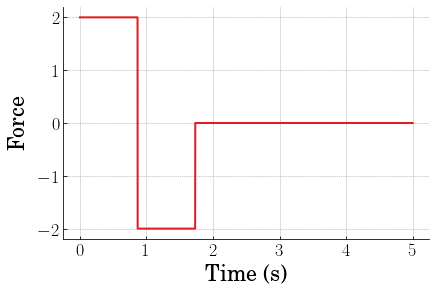

In [73]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, m*acc, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

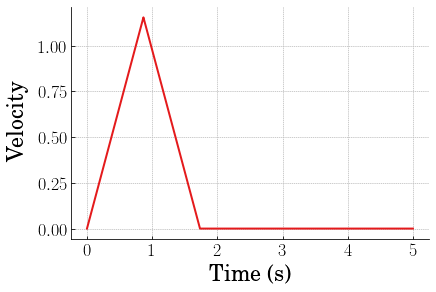

In [74]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Velocity', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, vel, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

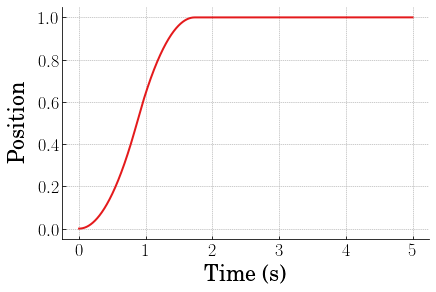

In [75]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## Input disturbance

In [89]:
t = np.arange(0,5,0.0001)
xd = 1
u_max = 2
f_t = 1
m = 1.5

acc, disturbance, vel, pos = system_response(xd,u_max,f_t,m,t)

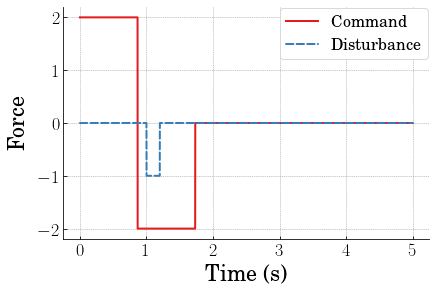

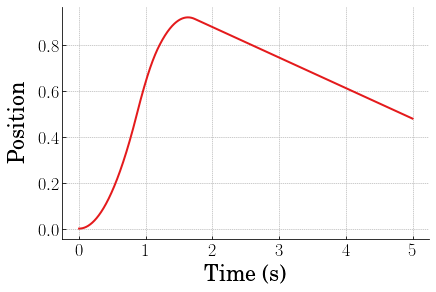

In [90]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, m*acc, linewidth=2, linestyle='-', label=r'Command')
plt.plot(t, m*disturbance, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## ON-OFF Feedback

In [91]:
def piecewise_command(xd,x,x_dot):
    u = u_max*(xd>x) - u_max*(xd<x)
    return u

# this is a stupid way to do this
def no_disturbance(t):
    return 0

# state-space-ish form of equations of motion
def eq_of_motion(t,w,control,disturbance):
    x, x_dot = w

    sys_eq = [x_dot,
              (control(xd,x,x_dot)-disturbance(t))/m,
                ]

    return sys_eq

In [92]:
X0 = [0,0]
arguments = [piecewise_command,no_disturbance]

resp = solve_ivp(eq_of_motion, (t[0], t[-1]), X0, t_eval=t, args=arguments)
pos = resp.y[0,:]
vel = resp.y[1,:]

acc = piecewise_command(xd,pos,vel)

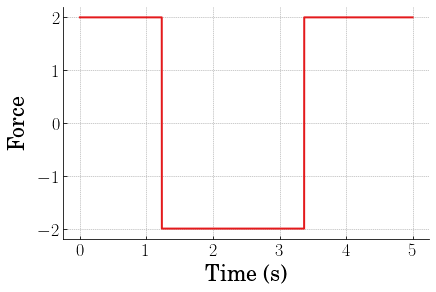

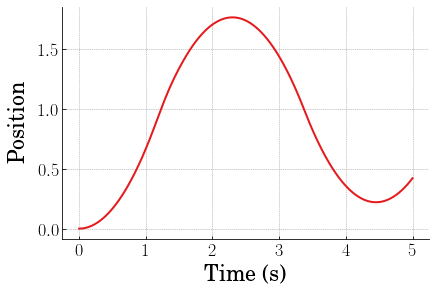

In [93]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, acc, linewidth=2, linestyle='-', label=r'Command')
# plt.plot(t, disturbance, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## Proportional Control

In [94]:
def proportional_control(xd,x,x_dot):
    u = 10*(xd-x)
    return u

X0 = [0,0]
arguments = [proportional_control,no_disturbance]

resp = solve_ivp(eq_of_motion, (t[0], t[-1]), X0, t_eval=t, args=arguments)
pos = resp.y[0,:]
vel = resp.y[1,:]

acc = proportional_control(xd,pos,vel)

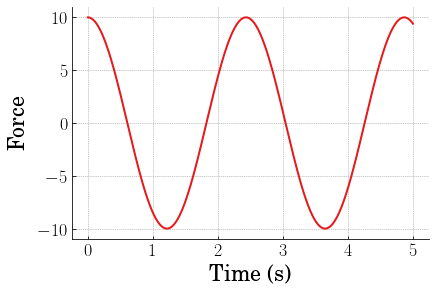

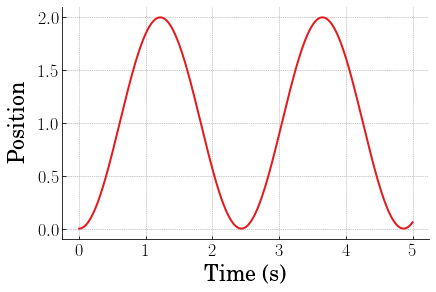

In [95]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, acc, linewidth=2, linestyle='-', label=r'Command')
# plt.plot(t, disturbance, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## Proportional-Derivative Control

In [96]:
def PD_control(xd,x,x_dot):
    u = 10*(xd-x) - 4.5*x_dot
    return u

X0 = [0,0]
arguments = [PD_control,no_disturbance]

resp = solve_ivp(eq_of_motion, (t[0], t[-1]), X0, t_eval=t, args=arguments)
pos = resp.y[0,:]
vel = resp.y[1,:]

acc = PD_control(xd,pos,vel)

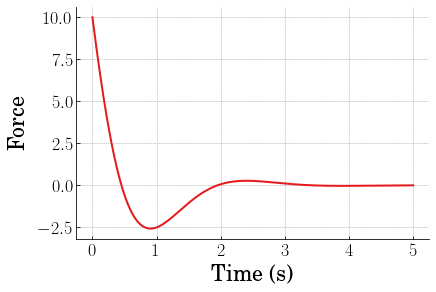

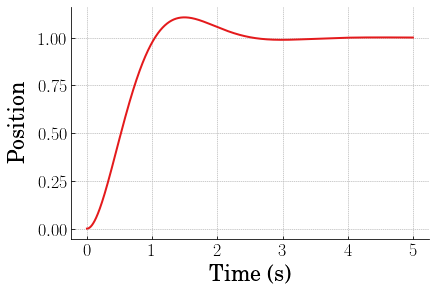

In [97]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, acc, linewidth=2, linestyle='-', label=r'Command')
# plt.plot(t, disturbance, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# # Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## PD With Disturbance

In [98]:
def disturbance_input(t):

    dist = (-f_t)*(t>=1)*(t<1.2)

    return dist

dist = disturbance_input(t)
X0 = [0,0]
arguments = [PD_control,disturbance_input]

resp = solve_ivp(eq_of_motion, (t[0], t[-1]), X0, t_eval=t, args=arguments)
pos = resp.y[0,:]
vel = resp.y[1,:]

acc = PD_control(xd,pos,vel)
dist = disturbance_input(t)

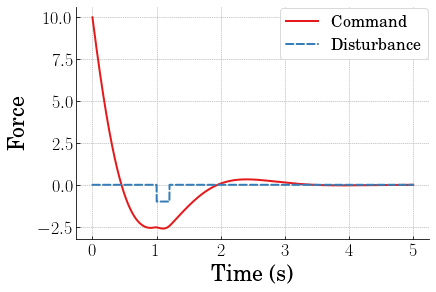

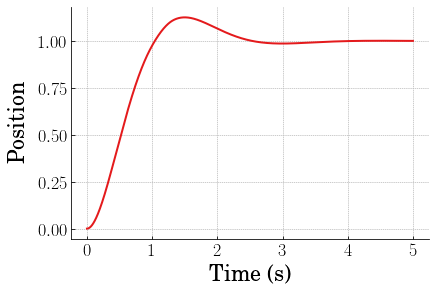

In [99]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, acc, linewidth=2, linestyle='-', label=r'Command')
plt.plot(t, dist, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

## Control Saturation

In [100]:
def PD_control_saturated(xd,x,x_dot):
    u = 10*(xd-x) - 4.5*x_dot
    u_clipped = np.clip(u,-2,2)

    return u_clipped

X0 = [0,0]
arguments = [PD_control_saturated,disturbance_input]

resp = solve_ivp(eq_of_motion, (t[0], t[-1]), X0, t_eval=t, args=arguments)
pos = resp.y[0,:]
vel = resp.y[1,:]

acc = PD_control_saturated(xd,pos,vel)
dist = disturbance_input(t)

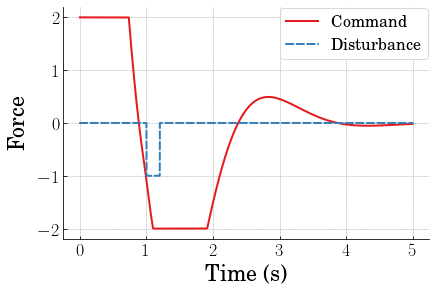

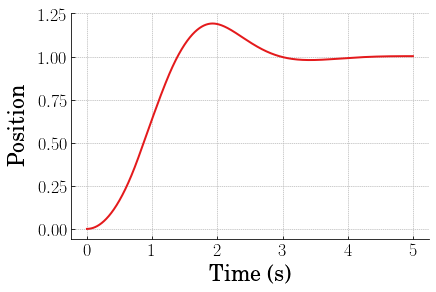

In [101]:
#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Force', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, acc, linewidth=2, linestyle='-', label=r'Command')
plt.plot(t, dist, linewidth=2, linestyle='--', label=r'Disturbance')

# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
ltext  = leg.get_texts()
plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')

#############################################################
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units font
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, pos, linewidth=2, linestyle='-', label=r'Response')
# plt.plot(time, -np.exp(-zeta*wn*time), linewidth=1, linestyle='--', color='#377eb8')
# uncomment below and set limits if needed
# plt.xlim(0,5)
# plt.ylim(-0.01,2.5)

# Create the legend, then fix the fontsize
# leg = plt.legend(loc='upper right', ncol = 1, fancybox=True, )
# ltext  = leg.get_texts()
# plt.setp(ltext,fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('plot_filename.pdf')